<a href="https://colab.research.google.com/github/c-e-leiva/AprendizajeAutomatico2/blob/main/TP1_MNIST_AA2_CARLOS_E_LEIVA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TP1 - Aprendizaje Automático 2**
## **Tema:** Multilayer Perceptron en PyTorch (clases 5 y 6 de MNIST)
## **Alumno:** Carlos Ezequiel Leiva
## **Profesora:** Ana Diedrichs

## **CONSIGNAS**

Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

Justificar cada paso realizado.

Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.








___________________
_____________



## **Introducción**

En este trabajo, comenzamos con una exploración detallada del dataset **MNIST** para entender su estructura y distribución. Cargamos tanto el conjunto de entrenamiento como el de prueba, y analizamos la cantidad de imágenes por clase para verificar la representatividad de cada una. Esta fase inicial también incluyó la visualización de ejemplos aleatorios de imágenes de cada clase, lo que nos permitió apreciar las variaciones y características de los datos, y nos brinda una mejor comprensión de la naturaleza del dataset original.

A continuación, procederemos a crear un dataset personalizado, seleccionando específicamente las **clases 5 y 6.** Estas clases fueron elegidas debido a su similitud, lo que nos permitirá evaluar la efectividad de los modelos de aprendizaje automático para distinguir entre ellas. Este enfoque tiene como objetivo demostrar cómo diferentes configuraciones de redes neuronales pueden abordar el desafío de clasificación en un problema con clases visualmente parecidas.

-------------


## Carga del Dataset Original (MNIST)
Primero cargamos el dataset completo de MNIST, que incluye las imágenes de entrenamiento y prueba. Esto nos proporciona acceso al conjunto de datos completo para su posterior análisis y filtrado.

Se importa el dataset MNIST utilizando la librería torchvision para trabajar con imágenes y transformarlas en tensores. Posteriormente, se imprime el número total de imágenes en los conjuntos de entrenamiento y prueba.

In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np

# Cargar el dataset completo MNIST (sin filtrar por clases específicas)
full_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
full_test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Cantidad total de imágenes en los datasets de entrenamiento y prueba
print(f"Cantidad total de imágenes en el conjunto de entrenamiento: {len(full_train_dataset)}")
print(f"Cantidad total de imágenes en el conjunto de prueba: {len(full_test_dataset)}")

Cantidad total de imágenes en el conjunto de entrenamiento: 60000
Cantidad total de imágenes en el conjunto de prueba: 10000


## 2. Visualización de las Distribuciones de Clases en el Dataset Original

Visualizamos la cantidad de imágenes de cada clase (del 0 al 9) para observar la distribución de las clases en los conjuntos de entrenamiento y prueba.

In [2]:
# Obtener las etiquetas (clases) para los datasets de entrenamiento y prueba
train_labels = np.array(full_train_dataset.targets)
test_labels = np.array(full_test_dataset.targets)

# Contar cuántos ejemplos de cada clase en entrenamiento y prueba
train_class_counts = dict(zip(*np.unique(train_labels, return_counts=True)))
test_class_counts = dict(zip(*np.unique(test_labels, return_counts=True)))

# Mostrar la distribución de las clases en los datasets de entrenamiento y prueba
print("\nDistribución de las clases en el conjunto de entrenamiento:")
for label, count in train_class_counts.items():
    print(f"Clase {label}: {count} imágenes")

print("\nDistribución de las clases en el conjunto de prueba:")
for label, count in test_class_counts.items():
    print(f"Clase {label}: {count} imágenes")


Distribución de las clases en el conjunto de entrenamiento:
Clase 0: 5923 imágenes
Clase 1: 6742 imágenes
Clase 2: 5958 imágenes
Clase 3: 6131 imágenes
Clase 4: 5842 imágenes
Clase 5: 5421 imágenes
Clase 6: 5918 imágenes
Clase 7: 6265 imágenes
Clase 8: 5851 imágenes
Clase 9: 5949 imágenes

Distribución de las clases en el conjunto de prueba:
Clase 0: 980 imágenes
Clase 1: 1135 imágenes
Clase 2: 1032 imágenes
Clase 3: 1010 imágenes
Clase 4: 982 imágenes
Clase 5: 892 imágenes
Clase 6: 958 imágenes
Clase 7: 1028 imágenes
Clase 8: 974 imágenes
Clase 9: 1009 imágenes


## 3. Distribución de Clases en el Dataset Original
Visualizamos la distribución de clases del conjunto de entrenamiento y prueba para comprender cuántas imágenes pertenecen a cada clase del 0 al 9 en el dataset original.


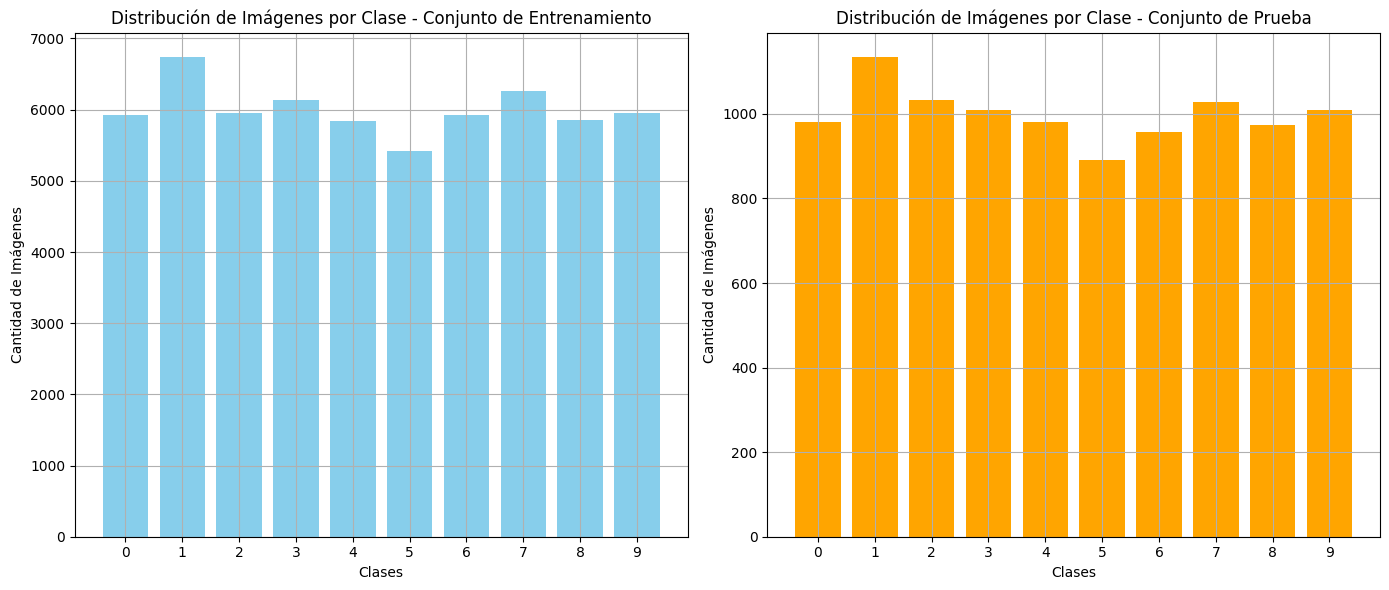

In [3]:
import matplotlib.pyplot as plt

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para el conjunto de entrenamiento
axes[0].bar(train_class_counts.keys(), train_class_counts.values(), color='skyblue')
axes[0].set_xlabel('Clases')
axes[0].set_ylabel('Cantidad de Imágenes')
axes[0].set_title('Distribución de Imágenes por Clase - Conjunto de Entrenamiento')
axes[0].set_xticks(range(10))
axes[0].grid(True)

# Gráfico para el conjunto de prueba
axes[1].bar(test_class_counts.keys(), test_class_counts.values(), color='orange')
axes[1].set_xlabel('Clases')
axes[1].set_ylabel('Cantidad de Imágenes')
axes[1].set_title('Distribución de Imágenes por Clase - Conjunto de Prueba')
axes[1].set_xticks(range(10))
axes[1].grid(True)

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## Visualización de imágenes aleatorias de cada clase

Este código selecciona y muestra una imagen aleatoria de cada clase **(del 0 al 9)** del conjunto de entrenamiento MNIST, permitiendo observar ejemplos representativos de cada número. Las imágenes se visualizan en una cuadrícula utilizando subplots. Además, se establece una semilla **(random.seed(10)**) para hacer que la selección de imágenes sea reproducible, garantizando que siempre se muestren las mismas imágenes en ejecuciones sucesivas del código.

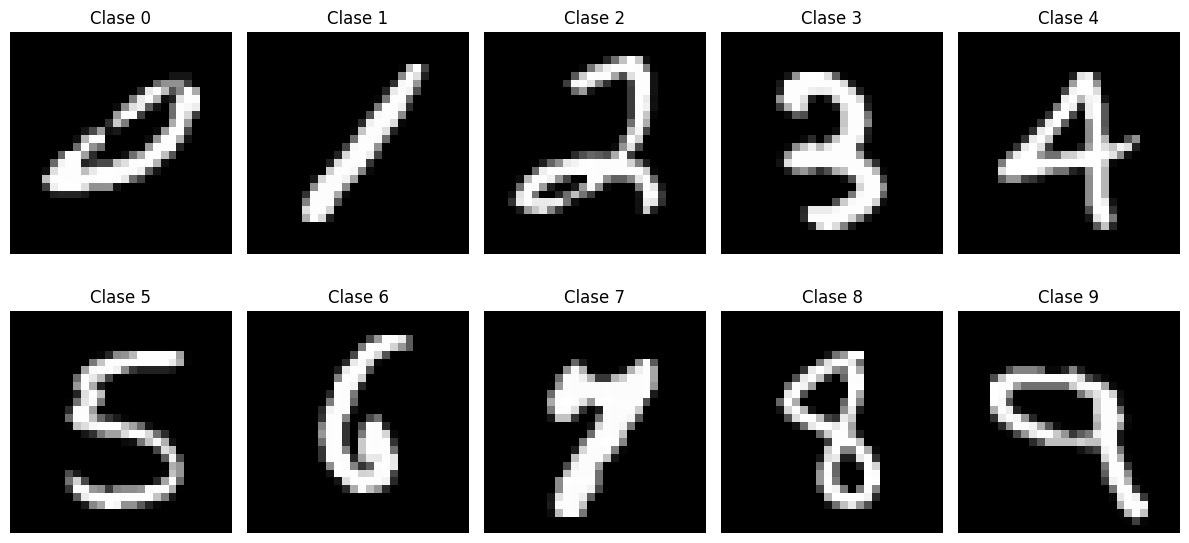

In [4]:
import random
import matplotlib.pyplot as plt

# Establecer la semilla para la aleatoriedad
random.seed(10)

# Visualizar una imagen aleatoria de cada clase (del 0 al 9)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Iterar sobre cada clase (del 0 al 9)
for i, class_label in enumerate(range(10)):
    # Filtrar el conjunto de entrenamiento para obtener solo las imágenes de la clase actual
    class_indices = [index for index, label in enumerate(full_train_dataset.targets) if label == class_label]

    # Elegir una imagen aleatoria de esa clase
    random_index = random.choice(class_indices)

    # Obtener la imagen y su etiqueta
    image, label = full_train_dataset[random_index]

    # Mostrar la imagen en el gráfico
    ax = axes[i // 5, i % 5]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f"Clase {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## 1- Usar pytorch para crear una clase que herede de dataset para crear un dataset propio.

El dataset está basado en el original de MNIST. En este dataset sólo se guardan dos de las 10 clases del dataset original


## Clase MNISTSubset

Creamos una clase personalizada que hereda de torch.utils.data.Dataset, diseñada para cargar un subconjunto del dataset MNIST, específicamente las clases 5 y 6. Estas clases se remapean a 0 y 1, respectivamente, para hacer más sencilla la clasificación binaria.

In [5]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms

# Definimos la clase personalizada MNISTSubset
class MNISTSubset(Dataset):
    def __init__(self, root='./data', train=True, download=True, transform=None, target_classes=[5, 6]):
        # Cargamos el dataset original MNIST
        self.mnist_dataset = datasets.MNIST(root=root, train=train, download=download, transform=transform)

        # Las clases objetivo a filtrar (en este caso, clases 5 y 6)
        self.target_classes = target_classes

        # Filtramos los índices de las imágenes que pertenecen a las clases seleccionadas
        self.indices = [i for i, target in enumerate(self.mnist_dataset.targets) if target in self.target_classes]

        # Filtramos las etiquetas correspondientes (5 y 6)
        self.targets = [self.mnist_dataset.targets[i] for i in self.indices]

        # Remapeamos las etiquetas 5 y 6 a 0 y 1
        self.targets = [self.target_classes.index(target) for target in self.targets]
        self.targets = torch.tensor(self.targets)

    # Método que devuelve la longitud del dataset filtrado
    def __len__(self):
        return len(self.indices)

    # Método para obtener una imagen y su etiqueta remapeada
    def __getitem__(self, idx):
        image, _ = self.mnist_dataset[self.indices[idx]]  # Obtener imagen desde el dataset original
        target = self.targets[idx]  # Obtener la etiqueta remapeada
        return image, target

## Crear dos instancias de MNISTSubset:
Una para entrenamiento y otra para prueba.

In [6]:
# Crear datasets de entrenamiento y prueba separados
train_dataset = MNISTSubset(train=True, target_classes=[5, 6])
test_dataset = MNISTSubset(train=False, target_classes=[5, 6])

## Ver la Distribución de las Clases Elegidas (5 y 6)

Contamos la cantidad de imágenes que pertenecen a cada una de las clases seleccionadas (5 y 6) en el dataset filtrado. Usamos la clase Counter de Python para contar las etiquetas de las imágenes.

In [7]:
import numpy as np
from collections import Counter

# Obtener las etiquetas de los datasets de entrenamiento y prueba
train_targets = train_dataset.targets.numpy()
test_targets = test_dataset.targets.numpy()

# Contar la cantidad de imágenes por clase en cada dataset
train_class_distribution = Counter(train_targets)
test_class_distribution = Counter(test_targets)

# Diccionario para mapear 0 -> 5 y 1 -> 6
label_mapping = {0: 5, 1: 6}

# Mostrar la distribución de las clases en el dataset de entrenamiento
print(f"Distribución de las clases en el dataset de entrenamiento:")
for label, count in train_class_distribution.items():
    print(f"Clase {label_mapping[label]}: {count} imágenes")

print()  # Espacio en blanco para separar

# Mostrar la distribución de las clases en el dataset de prueba
print(f"Distribución de las clases en el dataset de prueba:")
for label, count in test_class_distribution.items():
    print(f"Clase {label_mapping[label]}: {count} imágenes")

Distribución de las clases en el dataset de entrenamiento:
Clase 5: 5421 imágenes
Clase 6: 5918 imágenes

Distribución de las clases en el dataset de prueba:
Clase 5: 892 imágenes
Clase 6: 958 imágenes


## Visualización de la Distribución de Clases

Se un gráfico de barras que visualiza cuántas imágenes hay de cada clase en el dataset filtrado. Esto nos permite observar rápidamente la distribución de las clases 5 y 6.

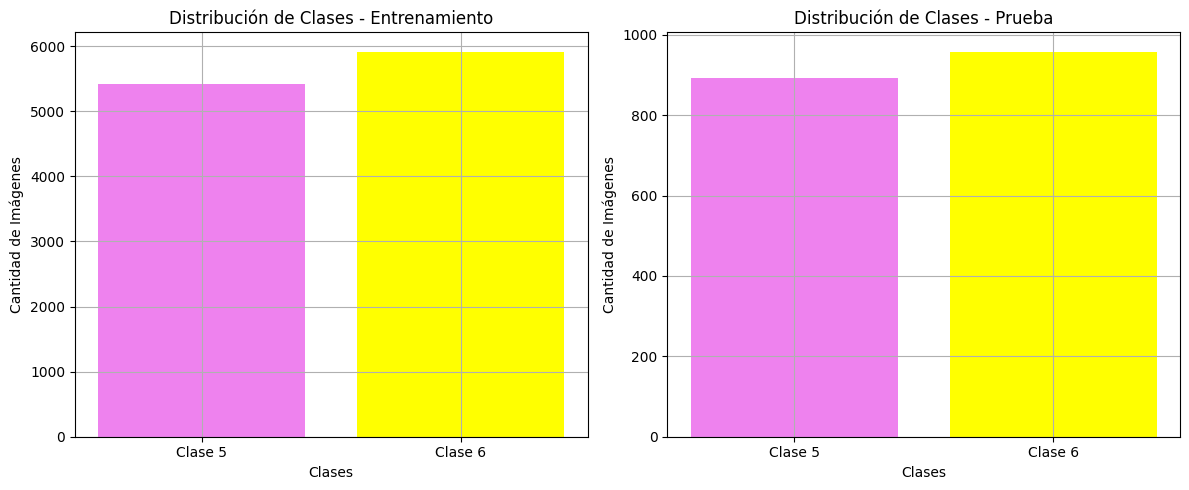

In [8]:
import matplotlib.pyplot as plt

colors = ['violet', 'yellow']

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de entrenamiento
axs[0].bar(train_class_distribution.keys(), train_class_distribution.values(), color=colors)
axs[0].set_xlabel('Clases')
axs[0].set_ylabel('Cantidad de Imágenes')
axs[0].set_title('Distribución de Clases - Entrenamiento')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Clase 5', 'Clase 6'])
axs[0].grid(True)

# Gráfico de prueba
axs[1].bar(test_class_distribution.keys(), test_class_distribution.values(), color=colors)
axs[1].set_xlabel('Clases')
axs[1].set_ylabel('Cantidad de Imágenes')
axs[1].set_title('Distribución de Clases - Prueba')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Clase 5', 'Clase 6'])
axs[1].grid(True)

plt.tight_layout()
plt.show()

## 2- Usar el dataset anterior para crear una red MLP en Pytorch para aprender un clasificador binario.

Debe contemplar tres tipos de configuraciones:

* 2.1 Una donde se muestre subajuste (underfitting).
* 2.2 Una donde considere que su funcionamiento es aceptable
* 2.3 Una donde demuestre un comportamiento de overfitting o sobreajuste.



## Se crean tres tipos de configuraciones de redes neuronales para abordar el problema de clasificación binaria:

## 2.1 Red que Subajusta (Underfitting)
Para crear un modelo que subajuste, definimos una red neuronal con pocas neuronas en las capas ocultas y entrenamos por un número limitado de épocas. Esto asegura que el modelo no tenga la capacidad suficiente para aprender los patrones de los datos.

In [9]:
import torch.nn as nn

class MLP_Underfitting(nn.Module):
    def __init__(self):
        super(MLP_Underfitting, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 8)  # Capa oculta con solo 8 neuronas
        self.fc2 = nn.Linear(8, 2)        # Capa de salida con 22 neuronas (clases 5 y 6)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Aplanar la imagen
        x = torch.relu(self.fc1(x))  # ReLU en la capa oculta
        x = self.fc2(x)              # Capa de salida
        return x

## 2.2 MLP Aceptable

Este modelo tiene una arquitectura más compleja, con capas ocultas adecuadas para que el modelo aprenda correctamente los patrones de los datos. El número de neuronas y las capas son suficientes para obtener un rendimiento aceptable.

In [10]:
class MLP_Aceptable(nn.Module):
    def __init__(self):
        super(MLP_Aceptable, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Capa oculta con 128 neuronas
        self.fc2 = nn.Linear(128, 64)       # Capa oculta con 64 neuronas
        self.fc3 = nn.Linear(64, 2)         # Capa de salida con 2 neuronas (clases 5 y 6)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Aplanar la imagen
        x = torch.relu(self.fc1(x))  # ReLU en la capa oculta
        x = torch.relu(self.fc2(x))  # ReLU en la segunda capa oculta
        x = self.fc3(x)              # Capa de salida
        return x

## 2.3 Red que Sobreajusta (Overfitting)

El sobreajuste se induce utilizando una red neuronal demasiado compleja, con muchas neuronas en las capas ocultas y un gran número de épocas de entrenamiento. Esto permite que el modelo aprenda demasiado bien los datos de entrenamiento, pero podría no generalizar bien para los datos de prueba.

In [11]:
class MLP_Overfitting(nn.Module):
    def __init__(self):
        super(MLP_Overfitting, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)  # 512 neuronas
        self.fc2 = nn.Linear(512, 256)      # 256 neuronas
        self.fc3 = nn.Linear(256, 128)      # 128 neuronas
        self.fc4 = nn.Linear(128, 64)       # 64 neuronas
        self.fc5 = nn.Linear(64, 2)         # Capa de salida

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Aplanar la imagen
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x


## 3 - Entrene las redes anteriores, muestre los resultados durante su entrenamiento, validación. Indique las métricas utilizadas. Justifique.

### 3.1 Cargue los datos, divida los conjuntos de datos

Cargamos el dataset filtrado para las clases 5 y 6, y aplicamos la transformación para convertir las imágenes en tensores.

Explicación:

Utilizamos transforms.ToTensor() para convertir las imágenes a tensores.

MNISTSubset filtra el dataset original, seleccionando solo las clases 5 y 6.

In [12]:
from torchvision import transforms

# Definir la transformación para convertir las imágenes a tensores
transform = transforms.Compose([transforms.ToTensor()])

# Crear una instancia del dataset filtrado para clases 5 y 6
mnist_subset = MNISTSubset(train=True, transform=transform, target_classes=[5, 6])

## División de los Conjuntos de Datos
En este bloque, dividimos el dataset en dos partes: un conjunto de entrenamiento (80%) y un conjunto de validación (20%).

Usamos random_split para dividir el dataset en entrenamiento y validación.

DataLoader organiza los datos en mini-batches, lo que facilita el procesamiento en las redes neuronales.

In [13]:
from torch.utils.data import random_split

# Dividir el conjunto de datos en entrenamiento (80%) y validación (20%)
train_size = int(0.8 * len(mnist_subset))  # 80% para entrenamiento
val_size = len(mnist_subset) - train_size  # 20% para validación

# Crear un generador con semilla para asegurar la división reproducible
train_data, val_data = random_split(mnist_subset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

# Crear DataLoader para cargar los datos en mini-batches
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)


### 3.2 Entrene cada modelo.

Se entrena cada uno de los modelos (subajuste, modelo aceptable y sobreajuste) utilizando el conjunto de entrenamiento. Evaluamos los resultados con el conjunto de validación para cada modelo, calculando métricas como la pérdida (loss) y precisión (accuracy) durante el proceso de entrenamiento y validación.

## Función general para entrenar un modelo

Esta función general entrena un modelo, calcula la pérdida y precisión en entrenamiento y validación, y guarda los resultados para graficarlos e imprime el reporte de clasificación final para evaluar el desempeño.



In [14]:
import torch.optim as optim
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report  # Importamos el reporte de clasificación

# Función para entrenar el modelo y almacenar resultados para graficar
def train_model(model, train_loader, val_loader, optimizer, criterion, epochs, results, model_name):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Listas para guardar todas las predicciones y etiquetas
    all_preds = []
    all_labels = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Entrenamiento
        for inputs, labels in train_loader:
            optimizer.zero_grad()

            # Realizar el pase hacia adelante
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()

            # Actualizar los pesos
            optimizer.step()

            # Calcular estadísticas
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Validación
        model.eval()
        with torch.no_grad():
            val_loss = 0.0
            val_correct = 0
            val_total = 0
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                # Guardamos las predicciones y etiquetas para el reporte de clasificación
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Guardar resultados para graficar
        train_losses.append(running_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))
        train_accuracies.append(100 * correct / total)
        val_accuracies.append(100 * val_correct / val_total)

        # Imprimir resultados por época
        print(f'Época {epoch+1}/{epochs} - '
              f'Entrenamiento Loss: {running_loss/len(train_loader):.4f} - '
              f'Validación Loss: {val_loss/len(val_loader):.4f} - '
              f'Precisión Entrenamiento: {100 * correct / total:.2f}% - '
              f'Precisión Validación: {100 * val_correct / val_total:.2f}%')

    # Imprimir el reporte de clasificación
    print(f"\nReporte de Clasificación - {model_name}:")
    print(classification_report(all_labels, all_preds))  # Imprimir el reporte de clasificación

    # Almacenar los resultados de este modelo
    results.append({
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'model_name': model_name
    })

# Inicializar una lista para almacenar los resultados de los 3 modelos
results = []

## 1. Entrenamiento del Modelo con Subajuste (Underfitting)
Se entrena un modelo sencillo con poca capacidad de aprendizaje (subajuste).

In [15]:
# Crear el modelo de subajuste
model_underfitting = MLP_Underfitting()
optimizer = optim.Adam(model_underfitting.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_model(model_underfitting, train_loader, val_loader, optimizer, criterion, epochs=5, results=results, model_name='Subajuste')

Época 1/5 - Entrenamiento Loss: 0.2310 - Validación Loss: 0.0953 - Precisión Entrenamiento: 91.35% - Precisión Validación: 96.56%
Época 2/5 - Entrenamiento Loss: 0.0720 - Validación Loss: 0.0730 - Precisión Entrenamiento: 97.67% - Precisión Validación: 97.35%
Época 3/5 - Entrenamiento Loss: 0.0581 - Validación Loss: 0.0669 - Precisión Entrenamiento: 98.11% - Precisión Validación: 97.62%
Época 4/5 - Entrenamiento Loss: 0.0520 - Validación Loss: 0.0639 - Precisión Entrenamiento: 98.28% - Precisión Validación: 97.80%
Época 5/5 - Entrenamiento Loss: 0.0474 - Validación Loss: 0.0645 - Precisión Entrenamiento: 98.47% - Precisión Validación: 97.57%

Reporte de Clasificación - Subajuste:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5505
           1       0.97      0.98      0.97      5835

    accuracy                           0.97     11340
   macro avg       0.97      0.97      0.97     11340
weighted avg       0.97      0.97      

## 2. Entrenamiento del Modelo MLP Aceptable
Se entrena un modelo con una arquitectura equilibrada que logra un buen desempeño, sin caer en subajuste ni sobreajuste.

In [16]:
# Crear el modelo MLP aceptable
model_acceptable = MLP_Aceptable()
optimizer = optim.Adam(model_acceptable.parameters(), lr=0.001)
train_model(model_acceptable, train_loader, val_loader, optimizer, criterion, epochs=10, results=results, model_name='MLP Aceptable')

Época 1/10 - Entrenamiento Loss: 0.1171 - Validación Loss: 0.0572 - Precisión Entrenamiento: 95.69% - Precisión Validación: 97.93%
Época 2/10 - Entrenamiento Loss: 0.0391 - Validación Loss: 0.0517 - Precisión Entrenamiento: 98.72% - Precisión Validación: 98.32%
Época 3/10 - Entrenamiento Loss: 0.0239 - Validación Loss: 0.0486 - Precisión Entrenamiento: 99.29% - Precisión Validación: 98.32%
Época 4/10 - Entrenamiento Loss: 0.0182 - Validación Loss: 0.0381 - Precisión Entrenamiento: 99.42% - Precisión Validación: 98.81%
Época 5/10 - Entrenamiento Loss: 0.0130 - Validación Loss: 0.0306 - Precisión Entrenamiento: 99.56% - Precisión Validación: 99.07%
Época 6/10 - Entrenamiento Loss: 0.0072 - Validación Loss: 0.0380 - Precisión Entrenamiento: 99.79% - Precisión Validación: 98.90%
Época 7/10 - Entrenamiento Loss: 0.0052 - Validación Loss: 0.0305 - Precisión Entrenamiento: 99.85% - Precisión Validación: 99.16%
Época 8/10 - Entrenamiento Loss: 0.0057 - Validación Loss: 0.0363 - Precisión Entre

## 3. Entrenamiento del Modelo con Sobreajuste (Overfitting)
Se entrena un modelo muy complejo (sobreajuste) que aprende demasiado bien los datos de entrenamiento, pero pierde capacidad de generalizar a nuevos datos.



In [17]:
# Crear el modelo de sobreajuste
model_overfitting = MLP_Overfitting()
optimizer = optim.Adam(model_overfitting.parameters(), lr=0.001)
train_model(model_overfitting, train_loader, val_loader, optimizer, criterion, epochs=30, results=results, model_name='Sobreajuste')

Época 1/30 - Entrenamiento Loss: 0.1111 - Validación Loss: 0.0562 - Precisión Entrenamiento: 96.46% - Precisión Validación: 98.19%
Época 2/30 - Entrenamiento Loss: 0.0331 - Validación Loss: 0.0463 - Precisión Entrenamiento: 98.83% - Precisión Validación: 98.68%
Época 3/30 - Entrenamiento Loss: 0.0222 - Validación Loss: 0.0354 - Precisión Entrenamiento: 99.28% - Precisión Validación: 98.85%
Época 4/30 - Entrenamiento Loss: 0.0163 - Validación Loss: 0.0337 - Precisión Entrenamiento: 99.46% - Precisión Validación: 98.99%
Época 5/30 - Entrenamiento Loss: 0.0098 - Validación Loss: 0.0331 - Precisión Entrenamiento: 99.68% - Precisión Validación: 99.25%
Época 6/30 - Entrenamiento Loss: 0.0065 - Validación Loss: 0.0342 - Precisión Entrenamiento: 99.77% - Precisión Validación: 98.85%
Época 7/30 - Entrenamiento Loss: 0.0083 - Validación Loss: 0.0337 - Precisión Entrenamiento: 99.76% - Precisión Validación: 99.25%
Época 8/30 - Entrenamiento Loss: 0.0102 - Validación Loss: 0.0380 - Precisión Entre

## Visualización Comparativa de los Modelos
Gráfico para comparar la evolución de la pérdida y la precisión entre los tres modelos (subajuste, aceptable y sobreajuste).

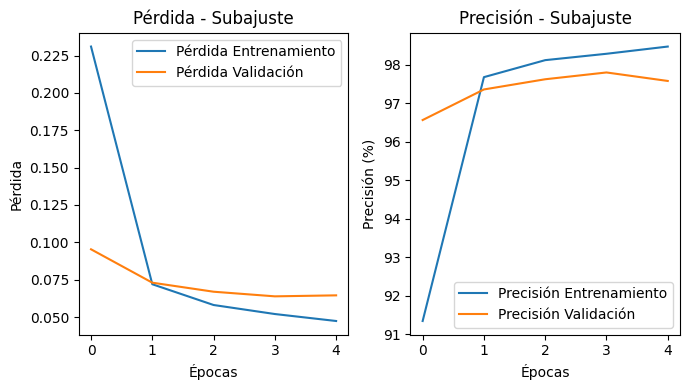

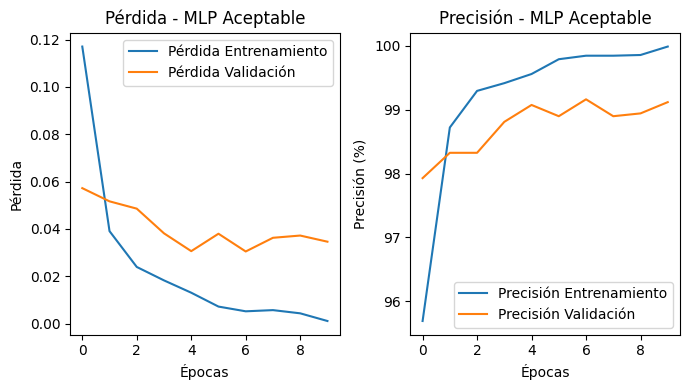

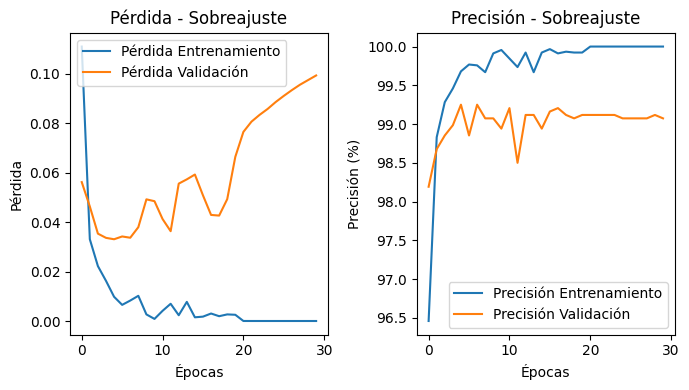

In [18]:
# Crear gráficos para comparar los 3 modelos
def plot_comparison(results):
    # Extraer los resultados de cada modelo
    model_names = ['Subajuste', 'MLP Aceptable', 'Sobreajuste']

    for i, result in enumerate(results):
        # Graficar la pérdida
        plt.figure(figsize=(7, 4))

        plt.subplot(1, 2, 1)
        plt.plot(result['train_losses'], label='Pérdida Entrenamiento')
        plt.plot(result['val_losses'], label='Pérdida Validación')
        plt.title(f'Pérdida - {model_names[i]}')
        plt.xlabel('Épocas')
        plt.ylabel('Pérdida')
        plt.legend()

        # Graficar la precisión
        plt.subplot(1, 2, 2)
        plt.plot(result['train_accuracies'], label='Precisión Entrenamiento')
        plt.plot(result['val_accuracies'], label='Precisión Validación')
        plt.title(f'Precisión - {model_names[i]}')
        plt.xlabel('Épocas')
        plt.ylabel('Precisión (%)')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Llamar a la función para mostrar las gráficas
plot_comparison(results)

# Conclusiones

A lo largo de este trabajo, probé diferentes configuraciones de parámetros, capas ocultas, cantidad de neuronas y épocas de entrenamiento con el objetivo de analizar el comportamiento del modelo frente al underfitting y al overfitting. Comencé utilizando una arquitectura simple, con solo 8 neuronas en una capa oculta y 5 épocas de entrenamiento, lo que resultó en un modelo que no logró aprender correctamente los patrones de los datos, evidenciando un caso de subajuste.
Luego, con una estructura más equilibrada, utilizando 128 y 64 neuronas en las capas ocultas y 10 épocas, el rendimiento mejoró de manera aceptable. Finalmente, al aumentar considerablemente la complejidad del modelo (512, 256, 128 y 64 neuronas) y entrenarlo por 30 épocas, observé signos de sobreajuste, donde el modelo aprendió excesivamente los datos de entrenamiento y perdió capacidad de generalización. Sin embargo, cabe destacar que, a pesar de las diferencias en las configuraciones probadas, los resultados no mostraron cambios tan marcados entre los modelos, lo que indica que sería necesario seguir explorando nuevas combinaciones de arquitecturas y parámetros para evaluar cómo impactan en el desempeño general. En conclusión, el equilibrio entre la complejidad de la red y la cantidad de épocas es esencial para lograr un modelo que generalice adecuadamente, evitando tanto el underfitting como el overfitting.

## Referencias

Clases de la materia Aprendizaje Automático 2 (AA2).

Interacción mediante prompt con ChatGPT para consultas específicas relacionadas al ajuste de modelos de redes neuronales.

**Ejemplos de prompts utilizados:**


"¿Qué es Overfitting y Underfitting en Machine Learning?"

"Cómo ajustar la arquitectura de una red neuronal para mejorar la generalización."

"¿Cuál es la diferencia entre un modelo con overfitting y uno con underfitting?"

"¿Qué arquitecturas de redes neuronales suelen producir overfitting?

¿Qué configuraciones tienden al underfitting?"

**youtube:** https://www.youtube.com/watch?v=LvSyyfnS1VQ
